importing Jupyter notebook from face_train.ipynb
importing Jupyter notebook from load_dataset.ipynb
[[[84 83 79]
  [81 80 76]
  [76 77 73]
  ...
  [26 47 49]
  [28 47 50]
  [24 43 46]]

 [[74 75 71]
  [71 72 68]
  [68 69 65]
  ...
  [23 44 46]
  [26 45 48]
  [23 42 45]]

 [[63 67 62]
  [58 62 57]
  [56 60 55]
  ...
  [22 45 47]
  [28 49 51]
  [27 48 50]]

 ...

 [[14 14 14]
  [15 15 15]
  [16 16 16]
  ...
  [43 57 76]
  [44 58 77]
  [53 67 86]]

 [[14 14 14]
  [15 15 15]
  [16 16 16]
  ...
  [48 62 81]
  [51 65 84]
  [51 65 84]]

 [[14 14 14]
  [15 15 15]
  [16 16 16]
  ...
  [51 65 84]
  [54 68 87]
  [47 61 80]]]
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
result: [[0.42856765 0.01833528 0.01650839 0

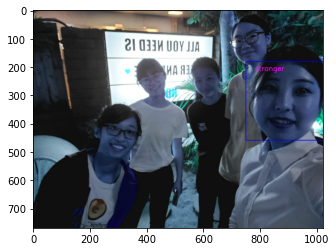

In [1]:
import cv2
import sys
import gc
import Ipynb_importer
# from keras.models import Model
from face_train import Model
from keras.models import Model as kModel
import csv
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import matplotlib.pyplot as plt
if __name__ == '__main__':

        
    #...
#     myModel = tf.keras.models.load_model("./model/haarcascade.face.model.h5")
    #載入模型
    model = Model()
    model.load_model(file_path = './model/haarcascade.face.model.h5')    
       
    #框住人臉的矩形邊框顏色       
    color = (0, 255, 0)
    
    #捕獲指定攝像頭的實時視訊流
#     cap = cv2.VideoCapture(0)
    
    #人臉識別分類器本地儲存路徑
    cascade_path = ".\opencv\\build\\etc\\haarcascades\\haarcascade_frontalface_default.xml"    
#     cascade_path = ".\opencv\\build\\etc\\lbpcascades\\lbpcascade_frontalface_improved.xml" 
    #迴圈檢測識別人臉
    
  
    frame = cv2.imread('./data/test/2.jpg')
    print(frame)
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    #使用人臉識別分類器，讀入分類器
    cascade = cv2.CascadeClassifier(cascade_path)  




    #利用分類器識別出哪個區域為人臉
    faceRects = cascade.detectMultiScale(frame_gray, scaleFactor = 1.2, minNeighbors = 4, minSize = (100, 100),flags = 1)        
    if len(faceRects) > 0:                 
        for faceRect in faceRects: 
            x, y, w, h = faceRect

            #擷取臉部影象提交給模型識別這是誰
            image = frame[y - 10: y + h + 10, x - 10: x + w + 10]
            faceID = model.face_predict(image)  
#                 model.predict_on_batch()
            print(faceID);
            peoples = {};
            with open('./faceDetail.csv', newline='') as csvfile:
              # 讀取 CSV 檔案內容
              rows = csv.reader(csvfile)
              for row in rows :
                if(row[1] == 'label') :
                    continue
                peoples[int(row[1])] = row[0]


            #如果是“我”


            if faceID == -1 :
                cv2.rectangle(frame, (x - 10, y - 10), (x + w + 10, y + h + 10), (0, 0, 255), thickness = 2)
                cv2.putText(frame,"stranger", 
                        (x + 30, y + 30),                      #座標
                        cv2.FONT_HERSHEY_SIMPLEX,              #字型
                        1,                                     #字號
                        (255,0,255),                           #顏色
                        2) 
            else :
                cv2.rectangle(frame, (x - 10, y - 10), (x + w + 10, y + h + 10), (0, 255, 0), thickness = 2)
                #文字提示是誰
                cv2.putText(frame,peoples.get(faceID,"stranger"), 
                        (x + 30, y + 30),                      #座標
                        cv2.FONT_HERSHEY_SIMPLEX,              #字型
                        1,                                     #字號
                        (255,0,255),                           #顏色
                        2)                                     #字的線寬
            resized_img = cv2.resize(frame, (1024, 768))
            #cv2.imshow('Facial emotion analysis ',resized_img)
            plt.imshow(cv2.cvtColor(resized_img, cv2.IMREAD_COLOR))
            # as opencv loads in BGR format by default, we want to show it in RGB.
            plt.show()   


    cv2.imshow("識別朕", frame)
        
     

    
    cv2.destroyAllWindows()